# Onedrivedownloader Test

This notebook tests using the `onedrivedownloader` package to download shared OneDrive files and then tests using `nibabel` to display the NIfTI files (`xxx.ni.gz`)

## 1. Installation and imports

In [2]:
!pip install onedrivedownloader nibabel

In [3]:
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# working_dir = '/content/drive/My Drive/Capstone/BioCV_Su23/src'
working_dir = '/content/drive/MyDrive/capstone/BioCV_Su23/src'

os.chdir(working_dir)

Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
import numpy as np

#******** TODO: DELETE this part when modules are finalized *********#
# Re-run this section to force reload of modules when they're being updated on the fly
import importlib
import utils.mri_common as mri_common
import utils.data_handler as dh
import utils.mri_plotter as mriplt

importlib.reload(mri_common)
importlib.reload(dh)
importlib.reload(mriplt)
#******************************************************************#
# Custom modules
import utils.mri_common as mri_common
from utils.data_handler import DataHandler, StructuralScan, MriType
from utils.mri_plotter import MRIPlotter

data_handler = DataHandler()

## 2. Download images

In [5]:
segm_files = data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED)
auto_segm_files = data_handler.list_mri_in_dir(mri_type=MriType.AUTO_SEGMENTED)
segm_reduced_files = data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED_REDUCED)
auto_segm_reduced_files =  data_handler.list_mri_in_dir(mri_type=MriType.AUTO_SEGMENTED_REDUCED)
auto_segm_reduced_norm_files =  data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED_REDUCED_NORM)
reduced_files = data_handler.list_mri_in_dir(mri_type=MriType.STRUCT_SCAN_REDUCED)

100%|██████████| 2.63M/2.63M [00:01<00:00, 1.79MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 147/147 [00:00<00:00, 1102.75it/s]
100%|██████████| 10.3M/10.3M [00:02<00:00, 4.40MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 611/611 [00:00<00:00, 3842.95it/s]
100%|██████████| 1.46G/1.46G [00:23<00:00, 63.0MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 736/736 [00:12<00:00, 57.38it/s]
100%|██████████| 1.86M/1.86M [00:00<00:00, 17.8MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 148/148 [00:00<00:00, 4721.88it/s]
100%|██████████| 1.46G/1.46G [00:43<00:00, 33.5MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 736/736 [00:13<00:00, 54.13it/s]


In [6]:
struct_files = data_handler.list_mri_in_dir(mri_type=MriType.STRUCT_SCAN)
print(f"Number of structural images: {len(struct_files)}")

100%|██████████| 5.85G/5.85G [02:00<00:00, 48.6MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 3355/3355 [01:17<00:00, 43.48it/s]

Number of structural images: 671


In [7]:
print(f"Number of manually-revised images: {len(segm_files)}")
print(f"Number of auto-segmented images: {len(auto_segm_files)}")

print(f"Number of reduced structural images: {len(reduced_files)}")
print(f"Number of reduced manually-revised images: {len(segm_reduced_files)}")
print(f"Number of reduced auto-segmented images: {len(auto_segm_reduced_files)}")
print(f"Number of reduced auto-segmented norm images: {len(auto_segm_reduced_norm_files)}")

Number of manually-revised images: 147
Number of auto-segmented images: 611
Number of reduced structural images: 735
Number of reduced manually-revised images: 735
Number of reduced auto-segmented images: 147
Number of reduced auto-segmented norm images: 735


In [8]:
print(f"Number of structural images: {len(struct_files)}")
# confirm that we can map between segmentation labels and structural images
# collect every segm file name in segm_files if it is in struct files and
# compare the length of the resulting list with the length of segm_files
# expect true
print((len([img for img in segm_files if img.split("_segm")[0] in struct_files])
 == len(segm_files)))

Number of structural images: 671
True


In [9]:
# dataset check
train_depth = data_handler.list_mri_in_dir(mri_type=MriType.TRAIN_2D_DEPTH)
val_depth = data_handler.list_mri_in_dir(mri_type=MriType.VAL_2D_DEPTH)
test_depth = data_handler.list_mri_in_dir(mri_type=MriType.TEST_2D_DEPTH)

train_cross_side = data_handler.list_mri_in_dir(mri_type=MriType.TRAIN_2D_CROSS_SIDE)
val_cross_side = data_handler.list_mri_in_dir(mri_type=MriType.VAL_2D_CROSS_SIDE)
test_cross_side = data_handler.list_mri_in_dir(mri_type=MriType.TEST_2D_CROSS_SIDE)

train_cross_front = data_handler.list_mri_in_dir(mri_type=MriType.TRAIN_2D_CROSS_FRONT)
val_cross_front = data_handler.list_mri_in_dir(mri_type=MriType.VAL_2D_CROSS_FRONT)
test_cross_front = data_handler.list_mri_in_dir(mri_type=MriType.TEST_2D_CROSS_FRONT)

print("train depth", len(train_depth))
print("val depth", len(val_depth))
print("test depth", len(test_depth))
print("train cross side", len(train_cross_side))
print("val cross side", len(val_cross_side))
print("test cross side", len(test_cross_side))
print("train cross front", len(train_cross_front))
print("val cross front", len(val_cross_front))
print("test cross front", len(test_cross_front))

100%|██████████| 932M/932M [00:12<00:00, 73.2MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 64241/64241 [00:16<00:00, 3958.83it/s]
100%|██████████| 315M/315M [00:03<00:00, 103MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 21901/21901 [00:04<00:00, 4849.90it/s]
100%|██████████| 288M/288M [00:12<00:00, 23.7MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 21171/21171 [00:05<00:00, 3929.30it/s]
100%|██████████| 929M/929M [00:10<00:00, 87.5MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 71721/71721 [00:13<00:00, 5137.87it/s]
100%|██████████| 314M/314M [00:03<00:00, 83.0MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 24451/24451 [00:04<00:00, 5331.97it/s]
100%|██████████| 288M/288M [00:11<00:00, 24.4MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 23636/23636 [00:06<00:00, 3886.65it/s]
100%|██████████| 960M/960M [00:11<00:00, 84.0MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 84921/84921 [00:20<00:00, 4091.40it/s]
100%|██████████| 324M/324M [00:04<00:00, 72.2MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 28951/28951 [00:06<00:00, 4379.21it/s]
100%|██████████| 297M/297M [00:03<00:00, 96.1MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 27986/27986 [00:06<00:00, 4651.16it/s]

train depth 64240
val depth 21900
test depth 21170
train cross side 71720
val cross side 24450
test cross side 23635
train cross front 84920
val cross front 28950
test cross front 27985


In [10]:
# AE dataset check. use these to validate AE
# train_ae_depth = data_handler.list_mri_in_dir(mri_type=MriType.TRAIN_AE_2D_DEPTH)
# val_ae_depth = data_handler.list_mri_in_dir(mri_type=MriType.VAL_AE_2D_DEPTH)
# test_ae_depth = data_handler.list_mri_in_dir(mri_type=MriType.TEST_AE_2D_DEPTH)

# train_ae_cross_side = data_handler.list_mri_in_dir(mri_type=MriType.TRAIN_AE_2D_CROSS_SIDE)
# val_ae_cross_side = data_handler.list_mri_in_dir(mri_type=MriType.VAL_AE_2D_CROSS_SIDE)
# test_ae_cross_side = data_handler.list_mri_in_dir(mri_type=MriType.TEST_AE_2D_CROSS_SIDE)

# train_ae_cross_front = data_handler.list_mri_in_dir(mri_type=MriType.TRAIN_AE_2D_CROSS_FRONT)
# val_ae_cross_front = data_handler.list_mri_in_dir(mri_type=MriType.VAL_AE_2D_CROSS_FRONT)
# test_ae_cross_front = data_handler.list_mri_in_dir(mri_type=MriType.TEST_AE_2D_CROSS_FRONT)

# print("train ae depth", len(train_ae_depth))
# print("val ae depth", len(val_ae_depth))
# print("test ae depth", len(test_ae_depth))
# print("train ae cross side", len(train_ae_cross_side))
# print("val ae cross side", len(val_ae_cross_side))
# print("test ae cross side", len(test_ae_cross_side))
# print("train ae cross front", len(train_ae_cross_front))
# print("val ae cross front", len(val_ae_cross_front))
# print("test ae cross front", len(test_ae_cross_front))

## 3. Preliminary visualization tests

### 3.a Plot sample GBM dataset

In [11]:
mri_plt = MRIPlotter()

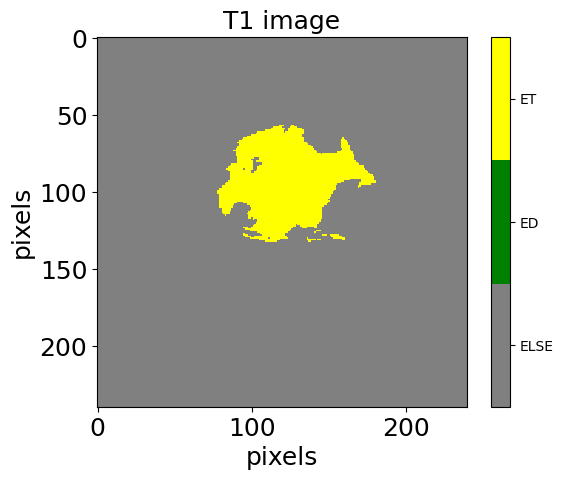

In [12]:
fig, axs = plt.subplots()
annotated_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.ANNOTATED)

mri_plt.plot_segm_img(img_data=annotated_img, fig=fig, axs=axs, row=0, col=1, title="T1 image")

plt.show()

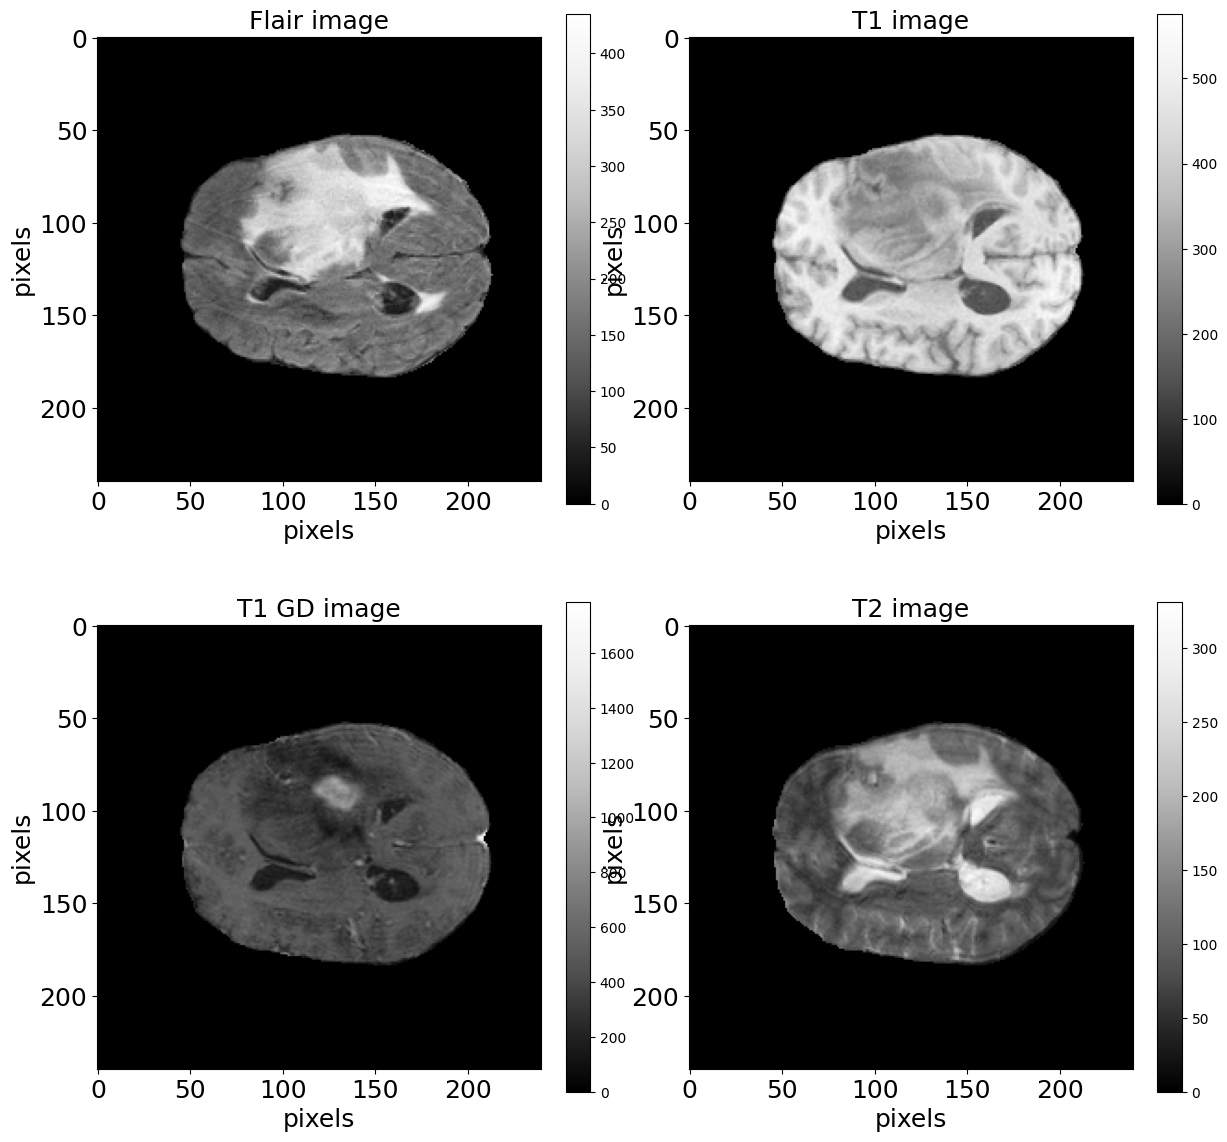

In [17]:
# TEST: Plot 2 row and 2 cols
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))
flair_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.FLAIR)
t1_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T1)
t1gd_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T1GD)
t2_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T2)


mri_plt.plot_struct_img(img_data=flair_img, fig=fig, axs=axs, row=0, col=0,
                        title="Flair image")

mri_plt.plot_struct_img(img_data=t1_img, fig=fig, axs=axs, row=0, col=1,
                        title="T1 image")

mri_plt.plot_struct_img(img_data=t1gd_img, fig=fig, axs=axs, row=1, col=0,
                        title="T1 GD image")

mri_plt.plot_struct_img(img_data=t2_img, fig=fig, axs=axs, row=1, col=1,
                        title="T2 image")


plt.show()

### 3.b. Plot the structural and segmented images and their corresponding reduced versions

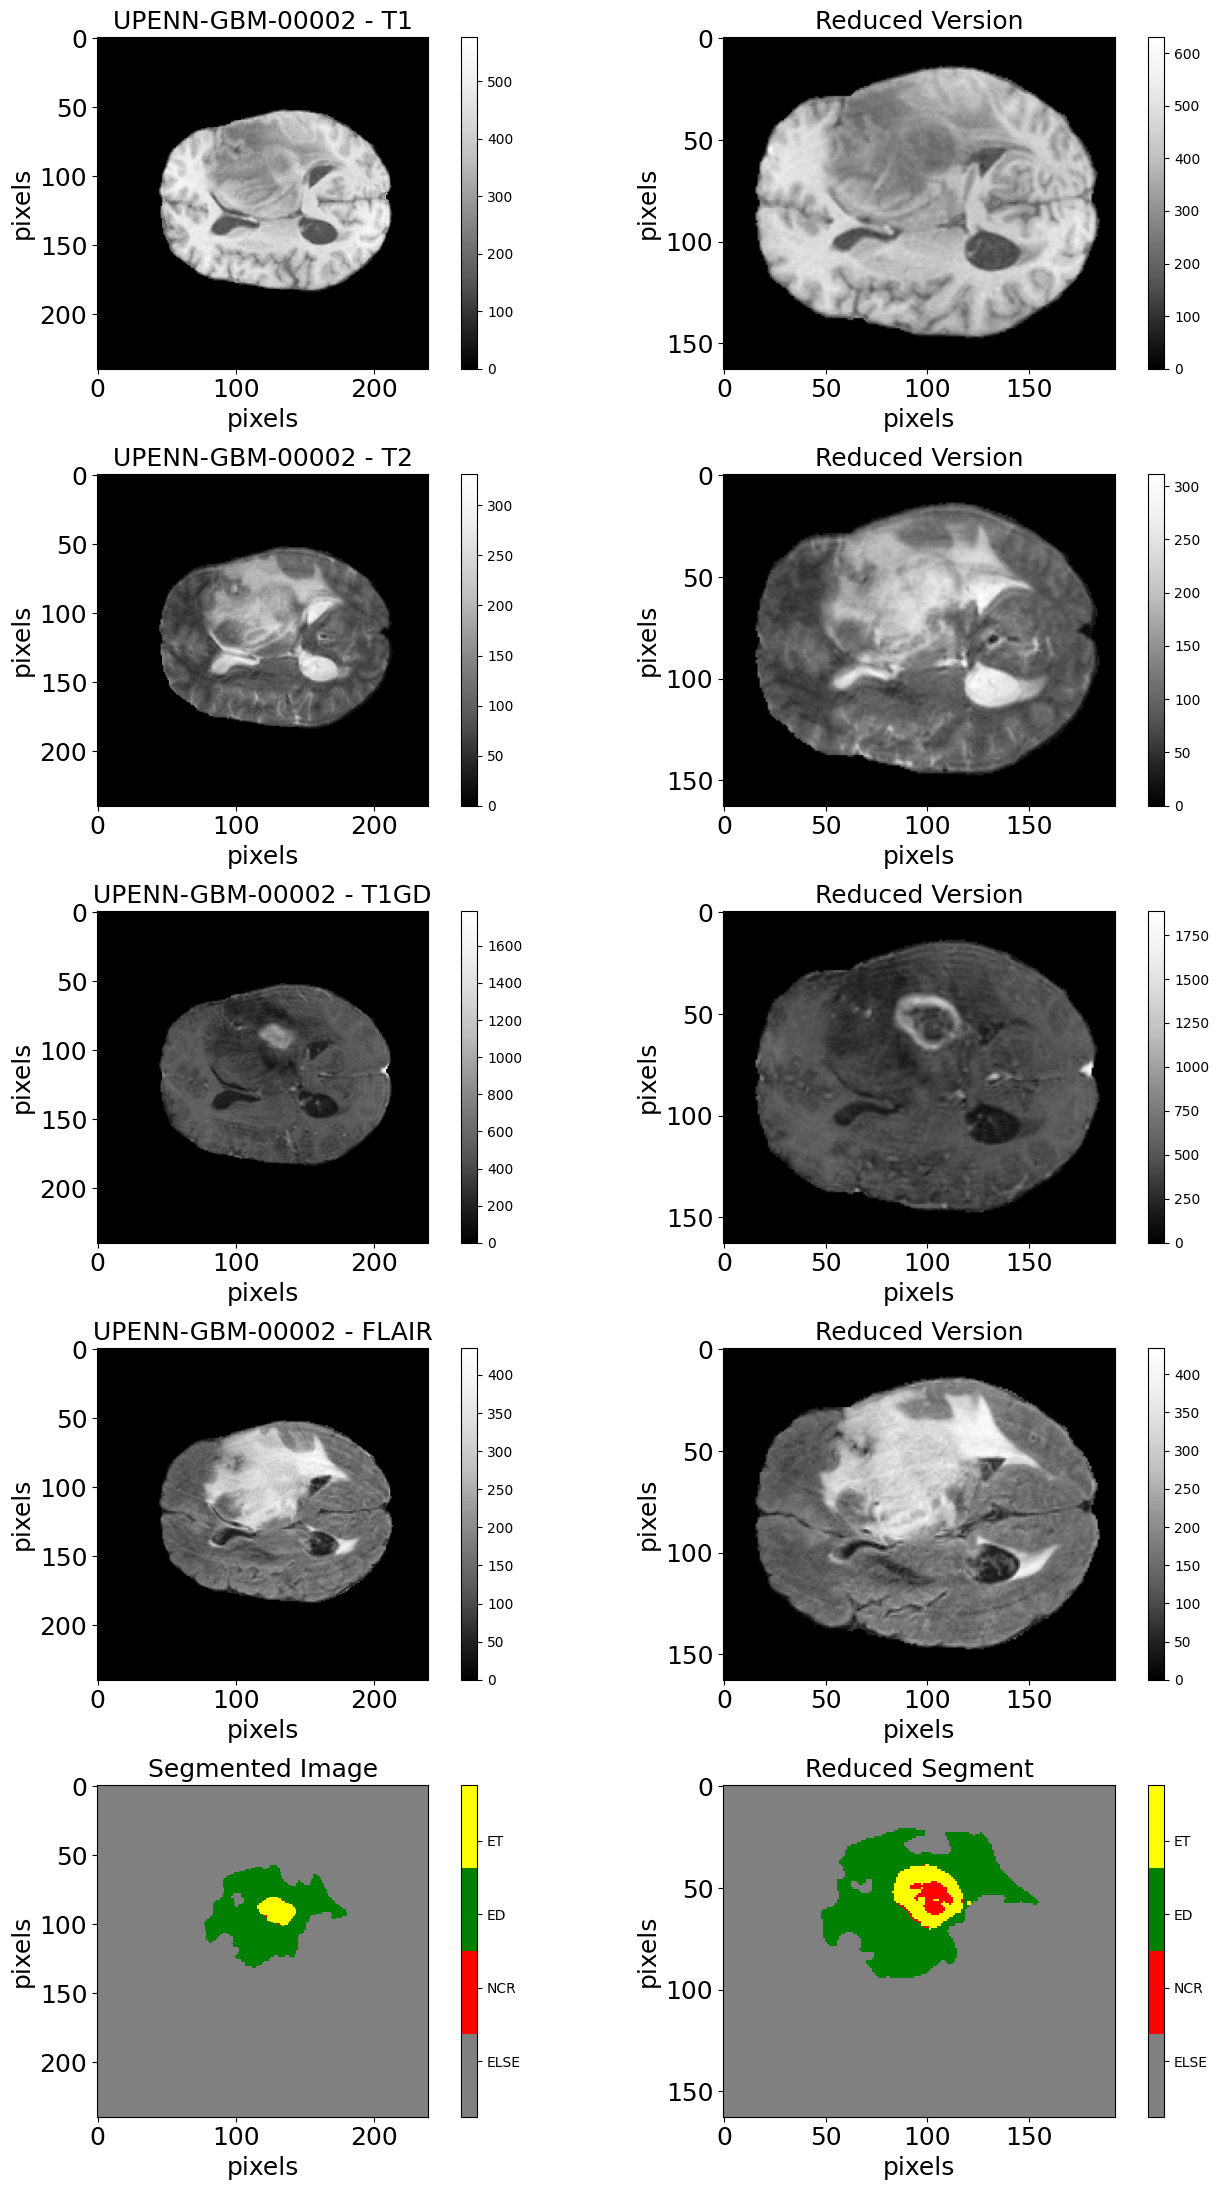

In [18]:
subj_file = segm_files[0].split("_")[0]

# plot struct and corresponding reduced images
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")

# finally, add the segmentation label at the last row
# a. plot the segmented image
segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED)
mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=4, col=0, title="Segmented Image")

# b. plot the reduced version of the segmented image
reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=4, col=1,
                      title="Reduced Segment")

# show the figure
plt.tight_layout()
plt.show()

In [19]:
# Check labels
print("segmentation labels", np.unique(segm_img))
print("reduced segmentation labels",  np.unique(reduced_segm_img))

segmentation labels [0 1 2 4]
reduced segmentation labels [0 1 2 4]


### 3.c. Plot the segments as overlay to the structural images

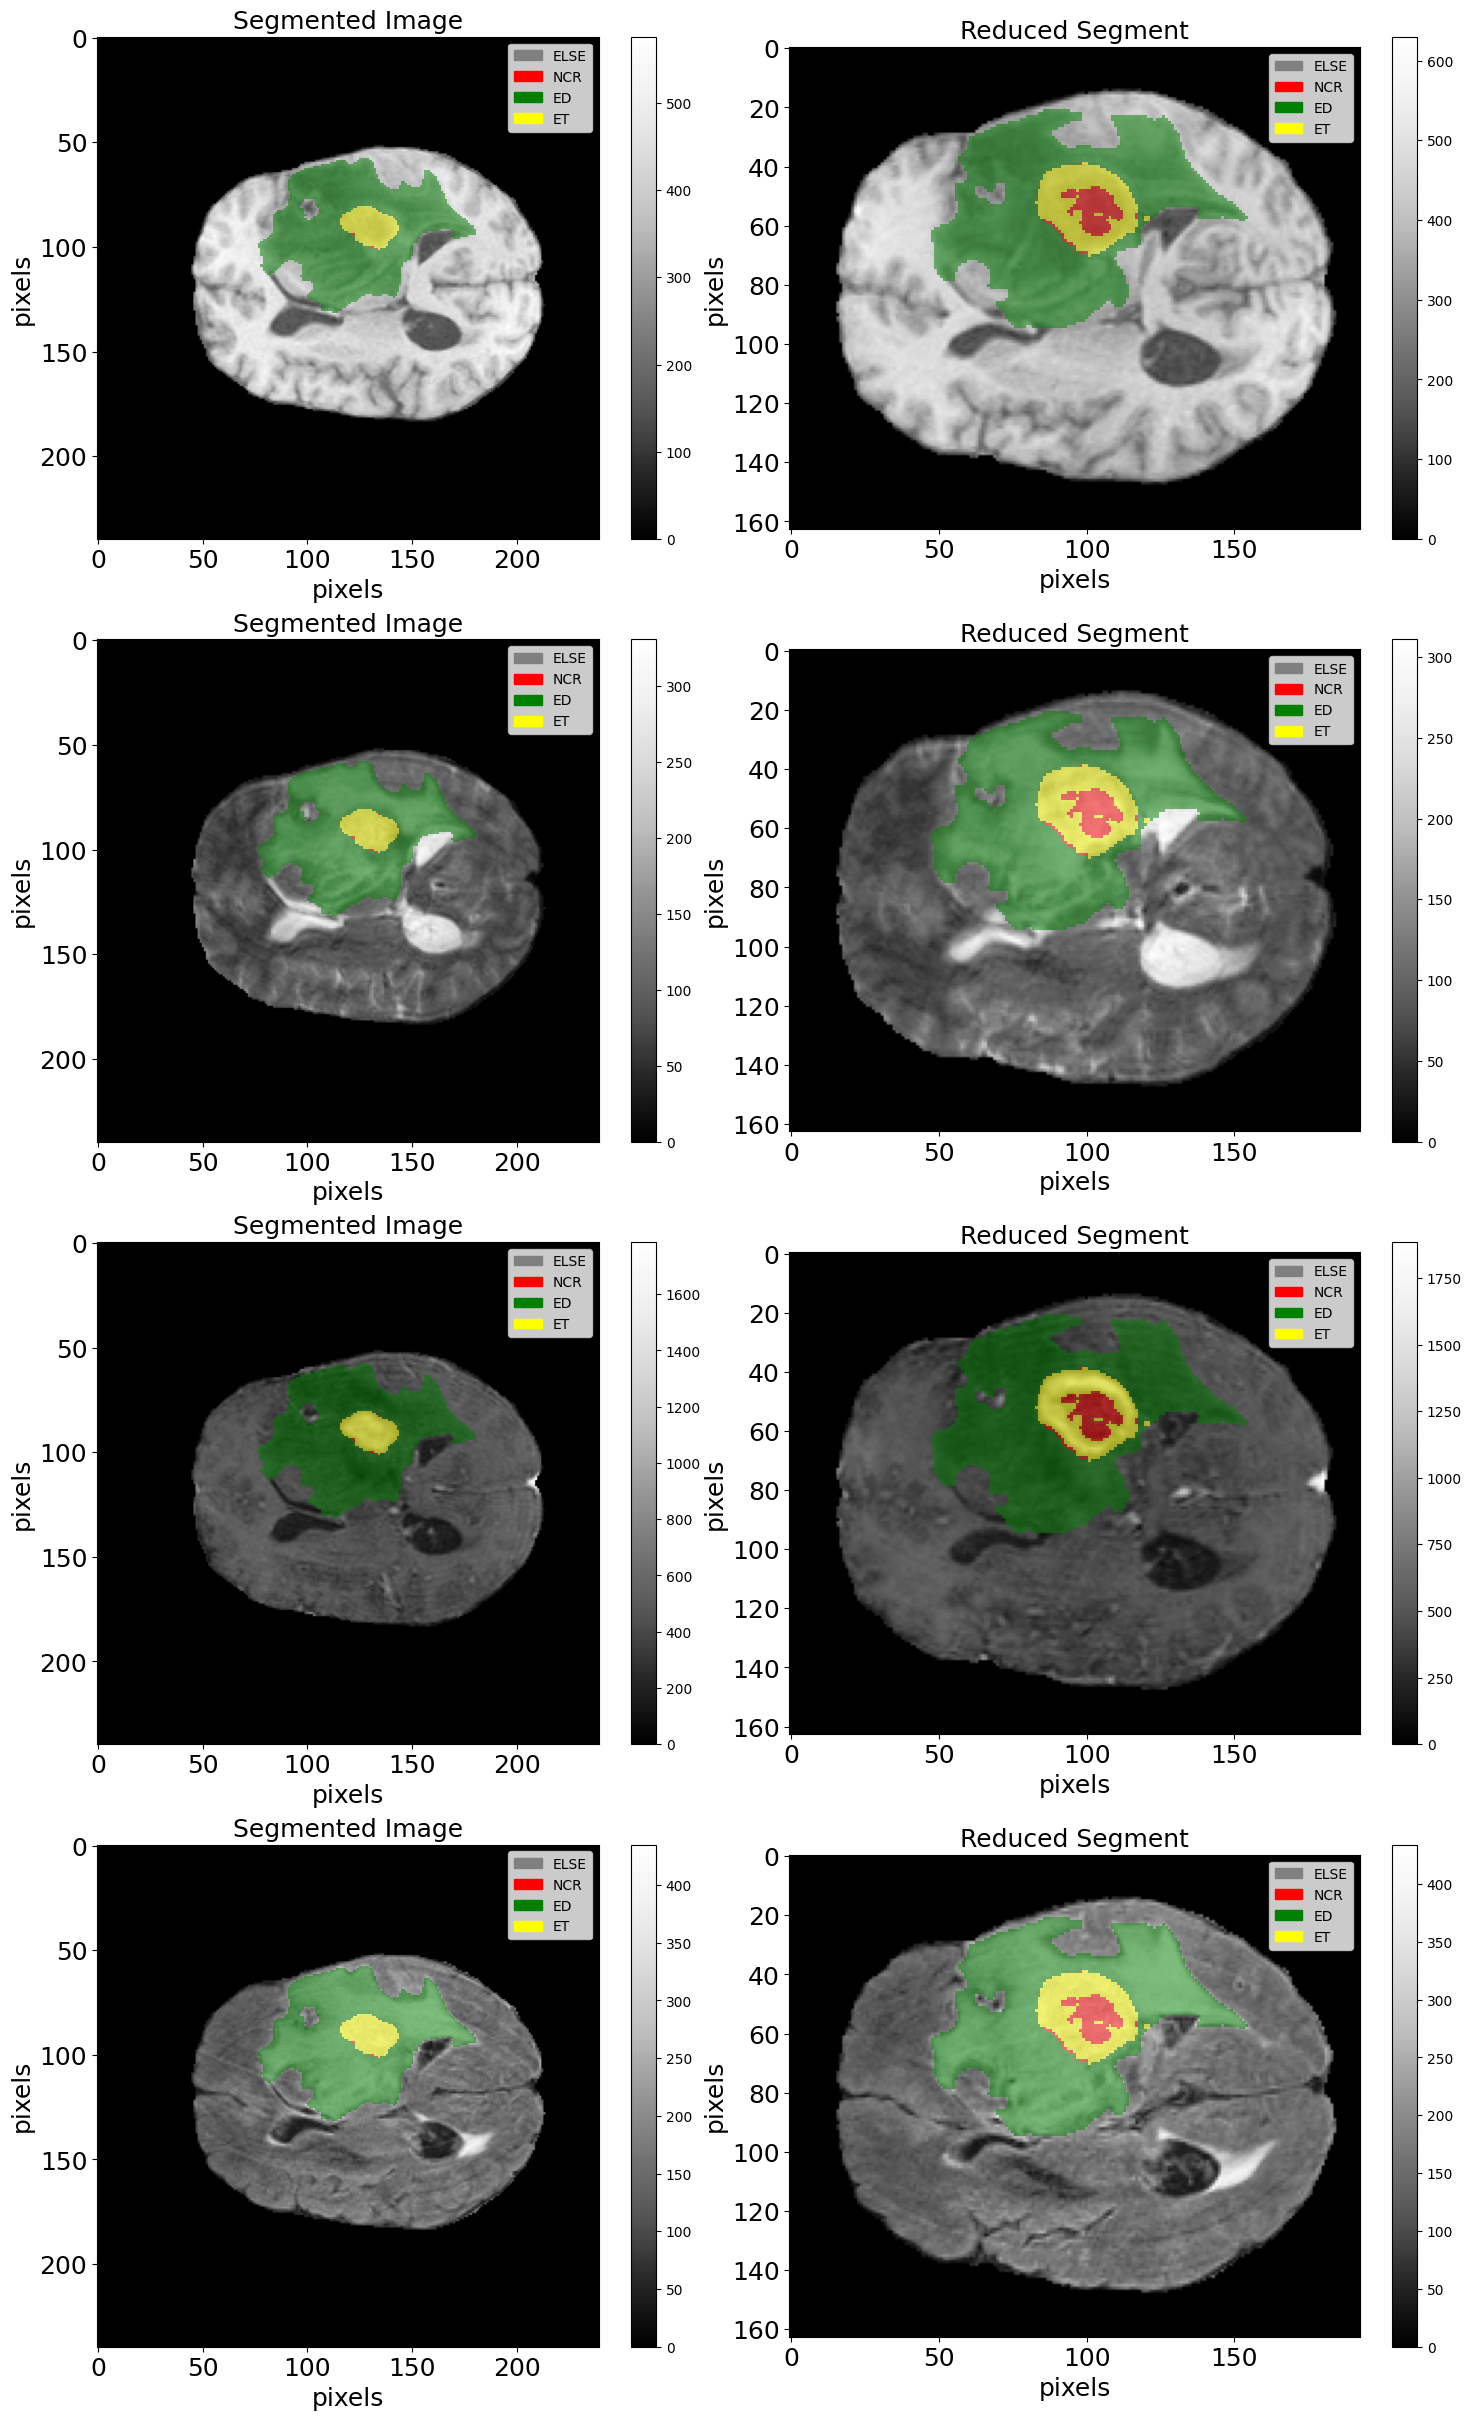

In [20]:
# extract the subject scan for the first manually-revised segmentation label e.g. UPENN-GBM-00002_11
subj_file = segm_files[0].split("_")[0]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 30))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # overlay segments on first column
    segm_img = data_handler.load_mri(subj_id=subj_file,
                                    mri_type=MriType.AUTO_SEGMENTED)
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=0,
                          overlay=True, use_legend=True, title="Segmented Image")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)
    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")


    # overlay reduced segments on second column
    reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=row, col=1,
                      overlay=True, use_legend=True, title="Reduced Segment")



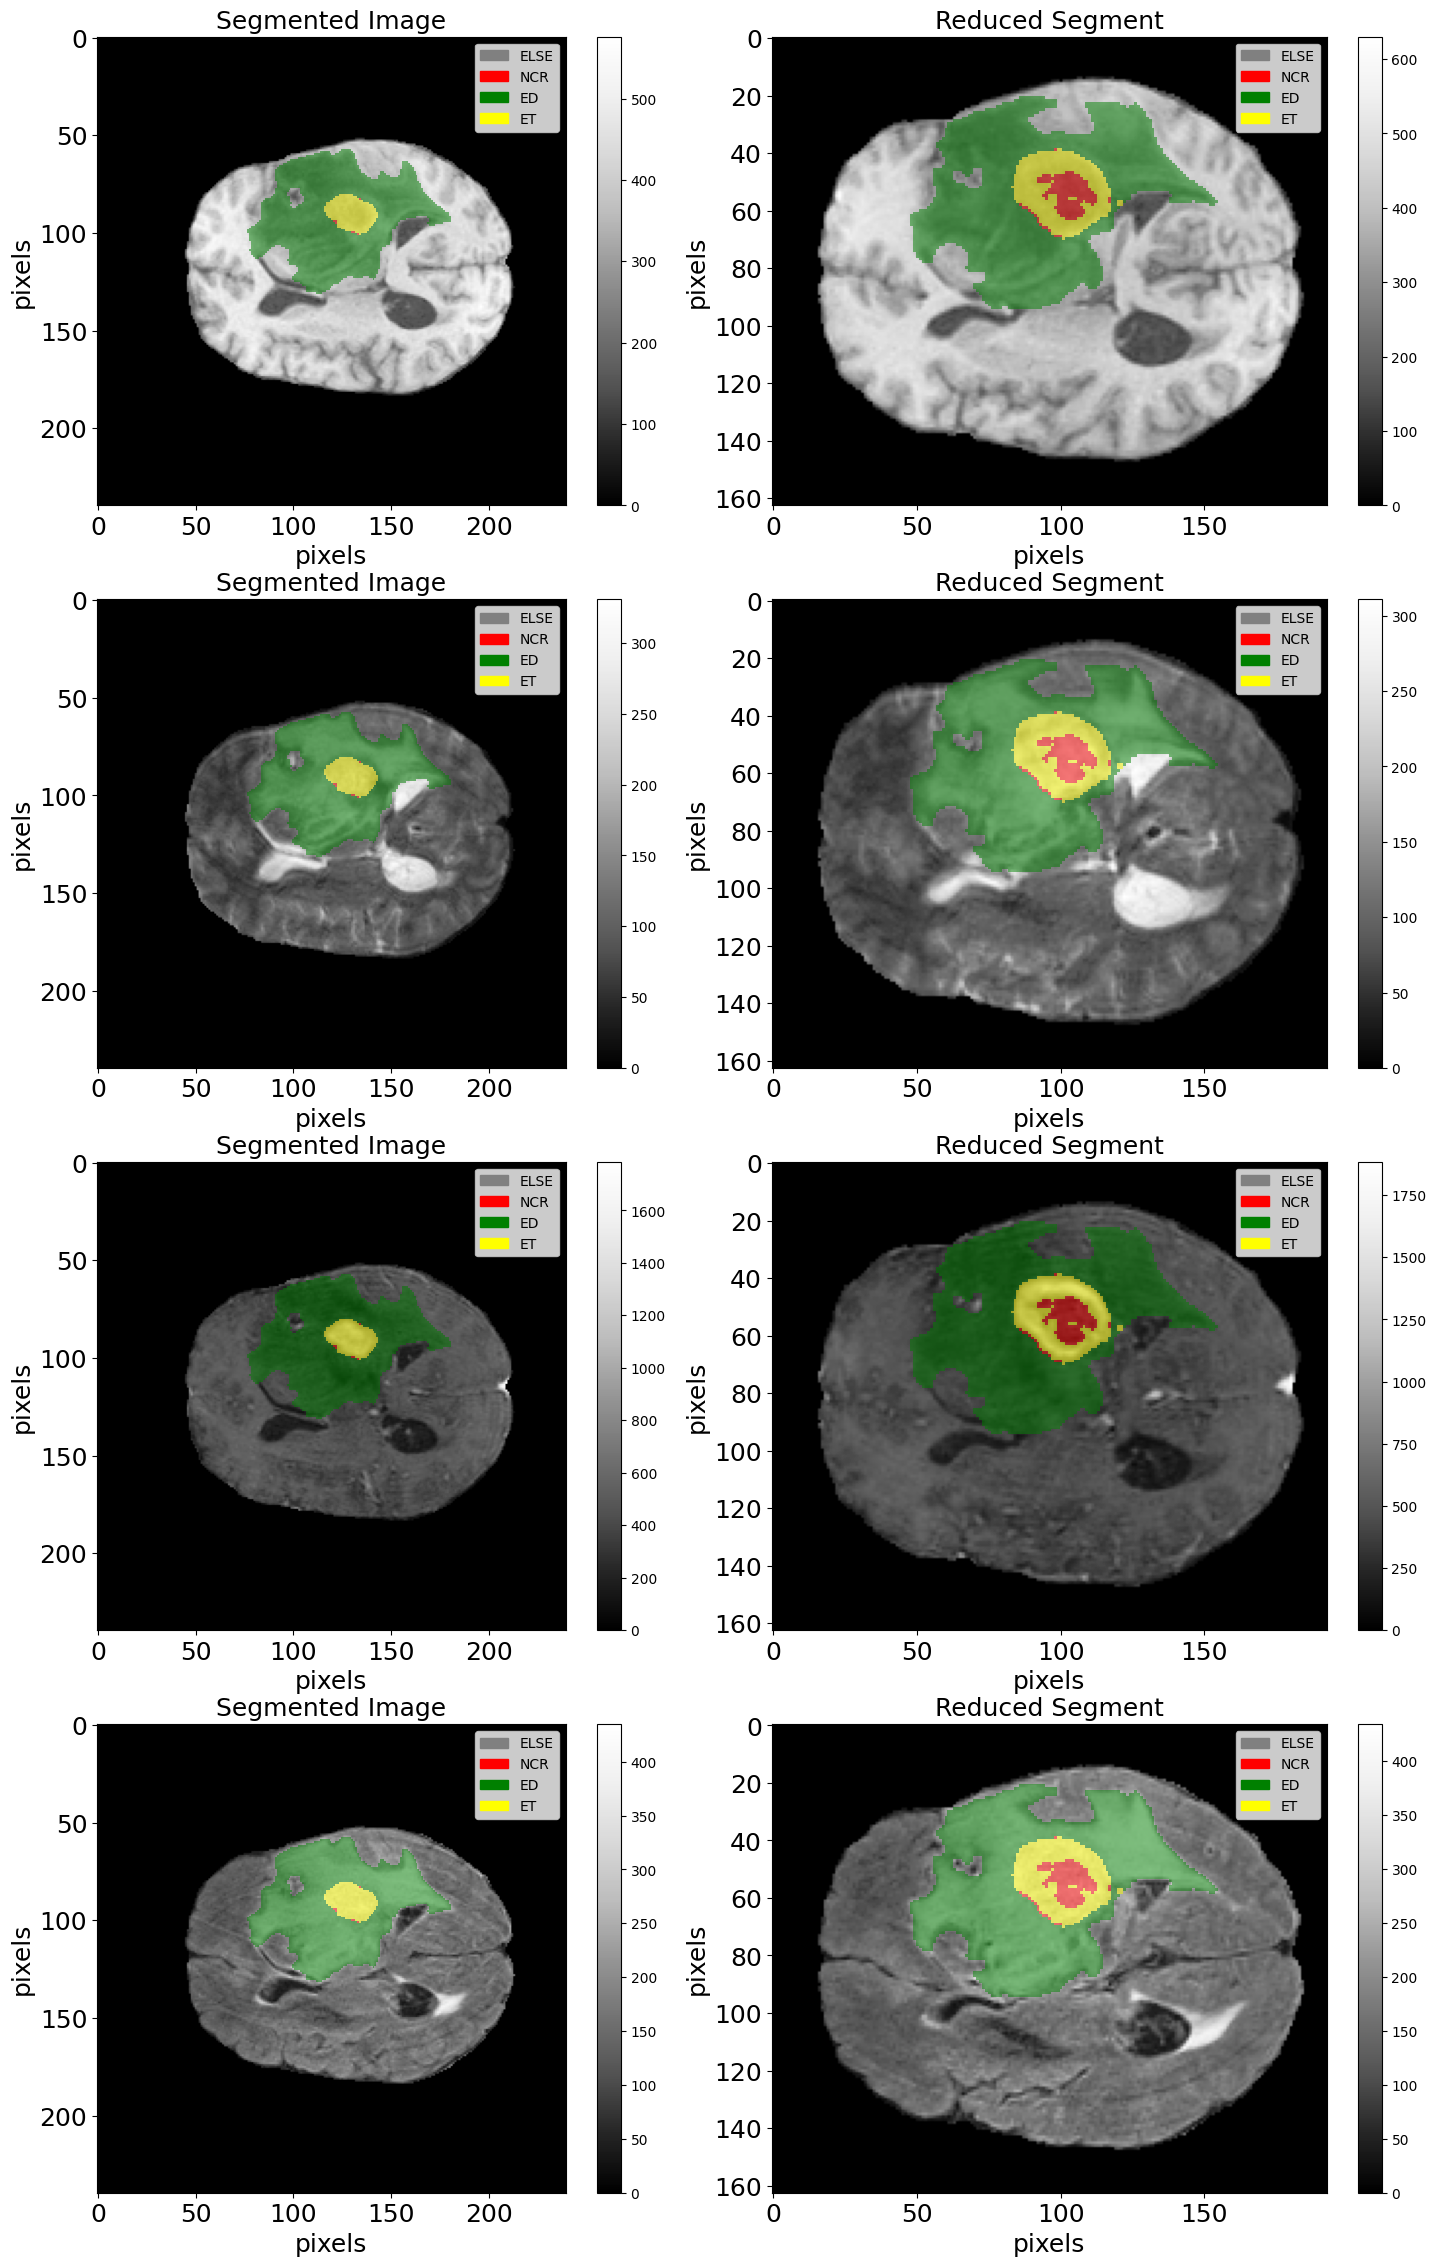

In [21]:
# plot image 2
subj_file = segm_files[0].split("_")[0]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 28))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # overlay segments on first column
    segm_img = data_handler.load_mri(subj_id=subj_file,
                                    mri_type=MriType.AUTO_SEGMENTED)
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=0,
                          overlay=True, use_legend=True, title="Segmented Image")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)
    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")


    # overlay reduced segments on second column
    reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=row, col=1,
                      overlay=True, use_legend=True, title="Reduced Segment")



### 3.d. Plot the first 5 annotated and auto labelled images side by side

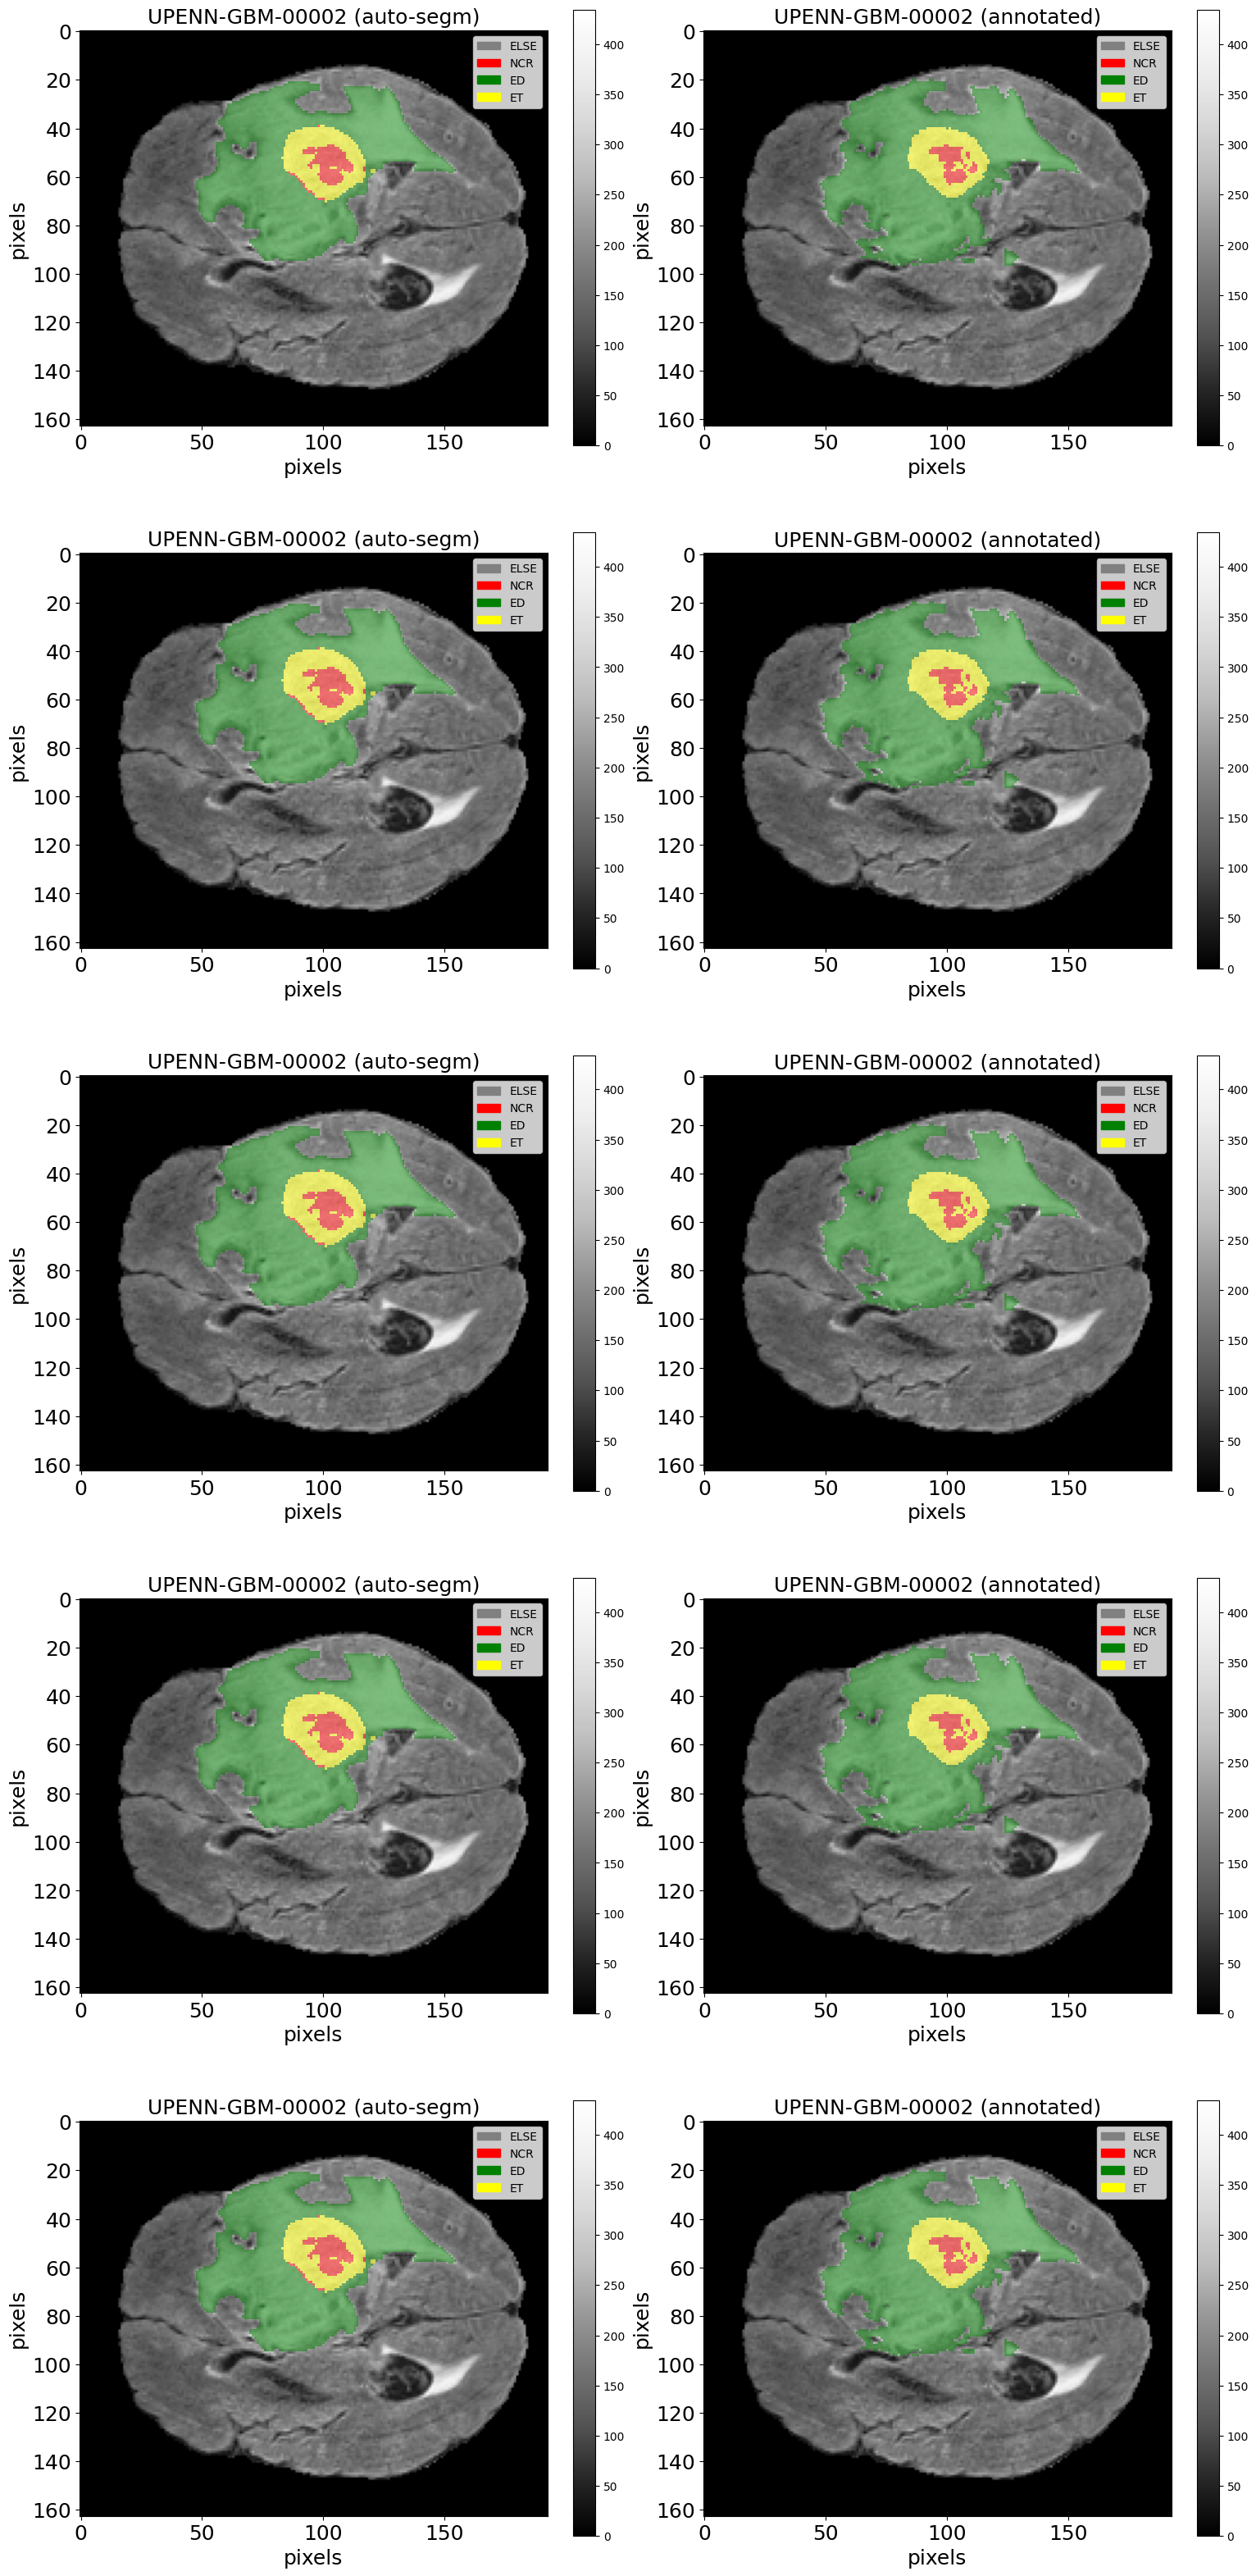

In [22]:
# load first 5 images
num_images = 5
fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(18, 8*num_images))
for row in range(num_images):

    subj_file = segm_files[0].split("_")[0]

    # Plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
    struct_reduced = data_handler.load_mri(subj_id=subj_file,
                            mri_type=MriType.STRUCT_SCAN_REDUCED,
                            struct_scan=StructuralScan.FLAIR)

    for col in range(2):
        mri_plt.plot_struct_img(img_data=struct_reduced, fig=fig, axs=axs, row=row, col=col)

    # plot auto labelled (reduced) on first column
    auto_segm = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=auto_segm, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} (auto-segm)",
                          overlay=True, use_legend=True)


    # plot manually annotated (reduced) on second column
    segm = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED_REDUCED)
    mri_plt.plot_segm_img(img_data=segm, fig=fig, axs=axs, row=row, col=1, title=f"{subj_file} (annotated)",
                          overlay=True, use_legend=True)

### 3.e Plot Sample from 2D training dataset

In [53]:
# load sample training images:
print("check sample filenames/patients from each dataset")

train_subj = train_depth[1100].split("_")[0]
val_subj = val_depth[1100].split("_")[0]
test_subj = test_depth[1100].split("_")[0]

print("train depth", train_subj)
print("val depth", val_subj)
print("test depth", test_subj)

train_base = data_handler.load_mri(subj_id=train_subj, mri_type=MriType.STRUCT_SCAN_REDUCED, struct_scan=StructuralScan.FLAIR)
val_base = data_handler.load_mri(subj_id=val_subj, mri_type=MriType.STRUCT_SCAN_REDUCED, struct_scan=StructuralScan.FLAIR)
test_base = data_handler.load_mri(subj_id=test_subj, mri_type=MriType.STRUCT_SCAN_REDUCED, struct_scan=StructuralScan.FLAIR)

depth_file_no = 112
train_depth_img = data_handler.load_mri(subj_id=train_subj, mri_type=MriType.TRAIN_2D_DEPTH, file_no=depth_file_no)
val_depth_img = data_handler.load_mri(subj_id=val_subj, mri_type=MriType.VAL_2D_DEPTH, file_no=depth_file_no)
test_depth_img = data_handler.load_mri(subj_id=test_subj, mri_type=MriType.TEST_2D_DEPTH, file_no=depth_file_no)

cross_side_file_no = 100
train_cross_side_img = data_handler.load_mri(subj_id=train_subj, mri_type=MriType.TRAIN_2D_CROSS_SIDE, file_no=cross_side_file_no)
val_cross_side_img = data_handler.load_mri(subj_id=val_subj, mri_type=MriType.VAL_2D_CROSS_SIDE, file_no=cross_side_file_no)
test_cross_side_img = data_handler.load_mri(subj_id=test_subj, mri_type=MriType.TEST_2D_CROSS_SIDE, file_no=cross_side_file_no)

cross_front_file_no = 90
train_cross_front_img = data_handler.load_mri(subj_id=train_subj, mri_type=MriType.TRAIN_2D_CROSS_FRONT, file_no=cross_front_file_no)
val_cross_front_img = data_handler.load_mri(subj_id=val_subj, mri_type=MriType.VAL_2D_CROSS_FRONT, file_no=cross_front_file_no)
test_cross_front_img = data_handler.load_mri(subj_id=test_subj, mri_type=MriType.TEST_2D_CROSS_FRONT, file_no=cross_front_file_no)

check sample filenames/patients from each dataset
train depth UPENN-GBM-00009
val depth UPENN-GBM-00013
test depth UPENN-GBM-00014


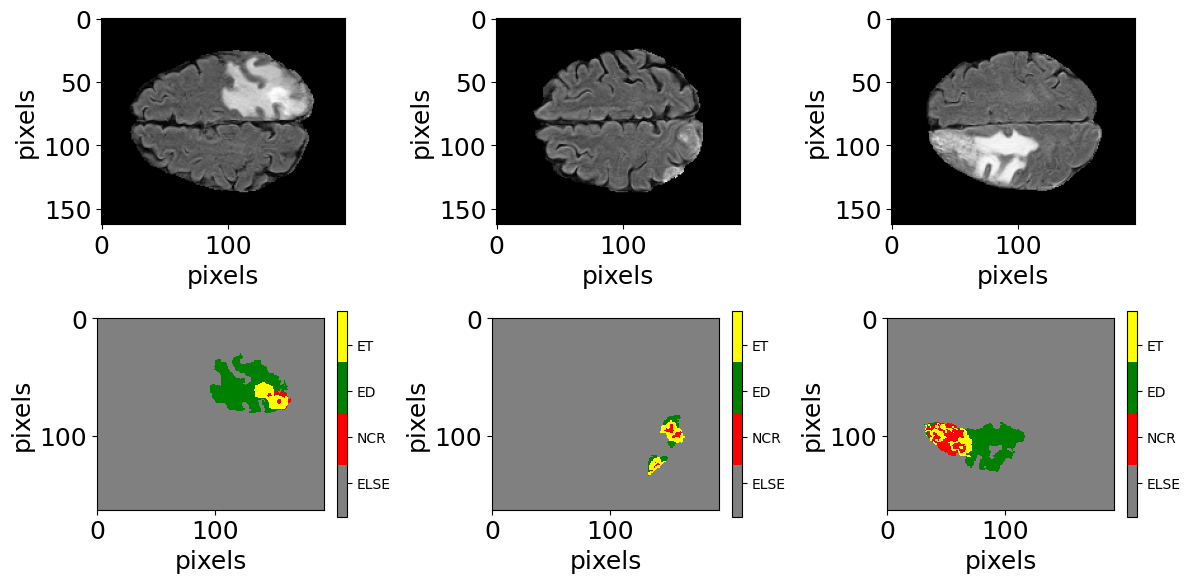

In [24]:
# depth plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# depth - base image
mri_plt.plot_struct_img(img_data=train_base[:, :, depth_file_no], fig=fig, axs=axs, row=0, col=0, colorbar=False)
mri_plt.plot_struct_img(img_data=val_base[:, :, depth_file_no], fig=fig, axs=axs, row=0, col=1, colorbar=False)
mri_plt.plot_struct_img(img_data=test_base[:, :, depth_file_no], fig=fig, axs=axs, row=0, col=2, colorbar=False)

# depth - segmentation
mri_plt.plot_segm_img(img_data=train_depth_img, fig=fig, axs=axs, row=1, col=0)
mri_plt.plot_segm_img(img_data=val_depth_img, fig=fig, axs=axs, row=1, col=1)
mri_plt.plot_segm_img(img_data=test_depth_img, fig=fig, axs=axs, row=1, col=2)
plt.tight_layout()
plt.show()

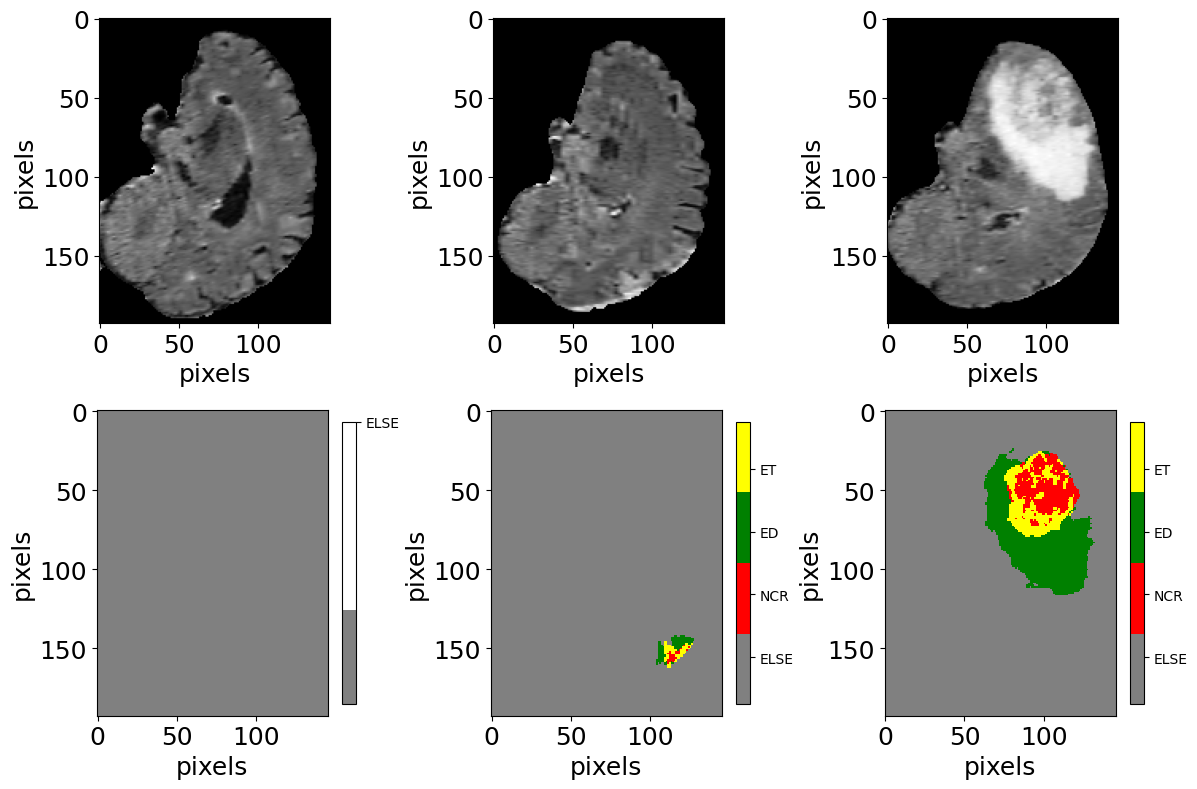

In [25]:
# cross side plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
# cross side - base image
mri_plt.plot_struct_img(img_data=train_base[cross_side_file_no, :, :], fig=fig, axs=axs, row=0, col=0, colorbar=False)
mri_plt.plot_struct_img(img_data=val_base[cross_side_file_no, :, :], fig=fig, axs=axs, row=0, col=1, colorbar=False)
mri_plt.plot_struct_img(img_data=test_base[cross_side_file_no, :, :], fig=fig, axs=axs, row=0, col=2, colorbar=False)

# cross side - segmentation
mri_plt.plot_segm_img(img_data=train_cross_side_img, fig=fig, axs=axs, row=1, col=0)
mri_plt.plot_segm_img(img_data=val_cross_side_img, fig=fig, axs=axs, row=1, col=1)
mri_plt.plot_segm_img(img_data=test_cross_side_img, fig=fig, axs=axs, row=1, col=2,)

plt.tight_layout()
plt.show()

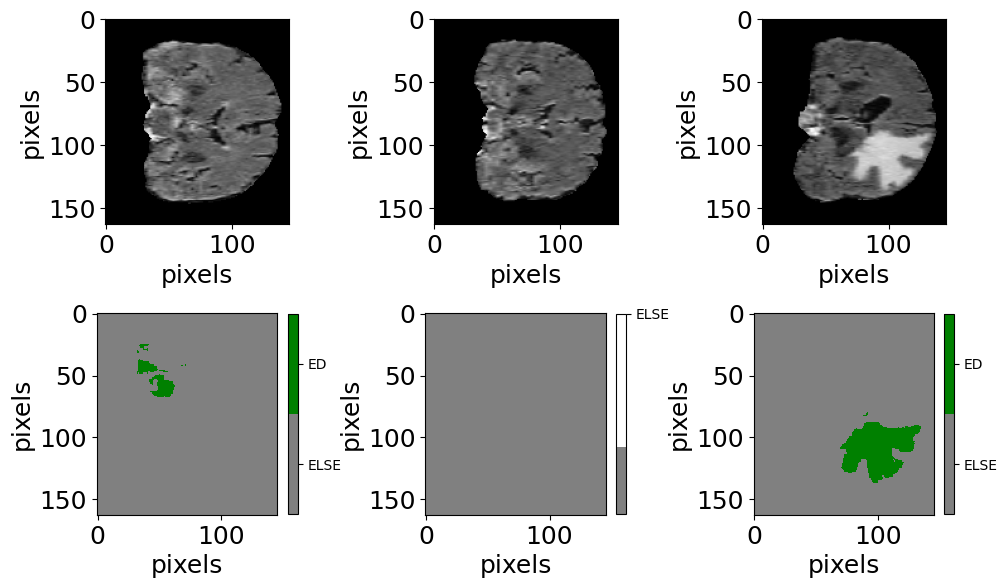

In [26]:
# cross front plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# cross front - base image
mri_plt.plot_struct_img(img_data=train_base[:, cross_front_file_no, :], fig=fig, axs=axs, row=0, col=0, colorbar=False)
mri_plt.plot_struct_img(img_data=val_base[:, cross_front_file_no, :], fig=fig, axs=axs, row=0, col=1, colorbar=False)
mri_plt.plot_struct_img(img_data=test_base[:, cross_front_file_no, :], fig=fig, axs=axs, row=0, col=2, colorbar=False)

# cross front - segmentation
mri_plt.plot_segm_img(img_data=train_cross_front_img, fig=fig, axs=axs, row=1, col=0)
mri_plt.plot_segm_img(img_data=val_cross_front_img, fig=fig, axs=axs, row=1, col=1)
mri_plt.plot_segm_img(img_data=test_cross_front_img, fig=fig, axs=axs, row=1, col=2)

plt.tight_layout()
plt.show()

### 3.f Plot Sample from 2D AE dataset

In [27]:
# # load sample training images:
# print("check sample filenames/patients from each dataset")

# train_ae_subj = train_ae_depth[1100].split("_")[0]
# val_ae_subj = val_ae_depth[1100].split("_")[0]
# test_ae_subj = test_ae_depth[1100].split("_")[0]

# print("train depth", train_subj)
# print("val depth", val_subj)
# print("test depth", test_subj)

# train_ae_base = data_handler.load_mri(subj_id=train_ae_subj, mri_type=MriType.STRUCT_SCAN_REDUCED, struct_scan=StructuralScan.FLAIR)
# val_ae_base = data_handler.load_mri(subj_id=val_ae_subj, mri_type=MriType.STRUCT_SCAN_REDUCED, struct_scan=StructuralScan.FLAIR)
# test_ae_base = data_handler.load_mri(subj_id=test_ae_subj, mri_type=MriType.STRUCT_SCAN_REDUCED, struct_scan=StructuralScan.FLAIR)

# depth_ae_file_no = 112
# train_ae_depth_img = data_handler.load_mri(subj_id=train_ae_subj, mri_type=MriType.TRAIN_2D_DEPTH, file_no=depth_file_no)
# val_ae_depth_img = data_handler.load_mri(subj_id=val_ae_subj, mri_type=MriType.VAL_2D_DEPTH, file_no=depth_file_no)
# test_ae_depth_img = data_handler.load_mri(subj_id=test_ae_subj, mri_type=MriType.TEST_2D_DEPTH, file_no=depth_file_no)

# cross_ae_side_file_no = 100
# train_ae_cross_side_img = data_handler.load_mri(subj_id=train_ae_subj, mri_type=MriType.TRAIN_2D_CROSS_SIDE, file_no=cross_side_file_no)
# val_ae_cross_side_img = data_handler.load_mri(subj_id=val_ae_subj, mri_type=MriType.VAL_2D_CROSS_SIDE, file_no=cross_side_file_no)
# test_ae_cross_side_img = data_handler.load_mri(subj_id=test_ae_subj, mri_type=MriType.TEST_2D_CROSS_SIDE, file_no=cross_side_file_no)

# cross_ae_front_file_no = 90
# train_ae_cross_front_img = data_handler.load_mri(subj_id=train_ae_subj, mri_type=MriType.TRAIN_2D_CROSS_FRONT, file_no=cross_front_file_no)
# val_ae_cross_front_img = data_handler.load_mri(subj_id=val_ae_subj, mri_type=MriType.VAL_2D_CROSS_FRONT, file_no=cross_front_file_no)
# test_ae_cross_front_img = data_handler.load_mri(subj_id=test_ae_subj, mri_type=MriType.TEST_2D_CROSS_FRONT, file_no=cross_front_file_no)

In [28]:
# # depth ae plot
# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# # depth - base image
# mri_plt.plot_struct_img(img_data=train_ae_base[:, :, depth_ae_file_no], fig=fig, axs=axs, row=0, col=0, colorbar=False)
# mri_plt.plot_struct_img(img_data=val_ae_base[:, :, depth_ae_file_no], fig=fig, axs=axs, row=0, col=1, colorbar=False)
# mri_plt.plot_struct_img(img_data=test_ae_base[:, :, depth_ae_file_no], fig=fig, axs=axs, row=0, col=2, colorbar=False)

# # depth - segmentation
# mri_plt.plot_segm_img(img_data=train_ae_depth_img, fig=fig, axs=axs, row=1, col=0)
# mri_plt.plot_segm_img(img_data=val_ae_depth_img, fig=fig, axs=axs, row=1, col=1)
# mri_plt.plot_segm_img(img_data=test_ae_depth_img, fig=fig, axs=axs, row=1, col=2)
# plt.tight_layout()
# plt.show()

In [29]:
# # cross side ae plot
# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
# # cross side - base image
# mri_plt.plot_struct_img(img_data=train_ae_base[cross_ae_side_file_no, :, :], fig=fig, axs=axs, row=0, col=0, colorbar=False)
# mri_plt.plot_struct_img(img_data=val_ae_base[cross_ae_side_file_no, :, :], fig=fig, axs=axs, row=0, col=1, colorbar=False)
# mri_plt.plot_struct_img(img_data=test_ae_base[cross_ae_side_file_no, :, :], fig=fig, axs=axs, row=0, col=2, colorbar=False)

# # cross side - segmentation
# mri_plt.plot_segm_img(img_data=train_ae_cross_side_img, fig=fig, axs=axs, row=1, col=0)
# mri_plt.plot_segm_img(img_data=val_ae_cross_side_img, fig=fig, axs=axs, row=1, col=1)
# mri_plt.plot_segm_img(img_data=test_ae_cross_side_img, fig=fig, axs=axs, row=1, col=2,)

# plt.tight_layout()
# plt.show()

In [30]:
# # cross front plot
# fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# # cross front - base image
# mri_plt.plot_struct_img(img_data=train_base[:, cross_ae_front_file_no, :], fig=fig, axs=axs, row=0, col=0, colorbar=False)
# mri_plt.plot_struct_img(img_data=val_base[:, cross_ae_front_file_no, :], fig=fig, axs=axs, row=0, col=1, colorbar=False)
# mri_plt.plot_struct_img(img_data=test_base[:, cross_ae_front_file_no, :], fig=fig, axs=axs, row=0, col=2, colorbar=False)

# # cross front - segmentation
# mri_plt.plot_segm_img(img_data=train_ae_cross_front_img, fig=fig, axs=axs, row=1, col=0)
# mri_plt.plot_segm_img(img_data=val_ae_cross_front_img, fig=fig, axs=axs, row=1, col=1)
# mri_plt.plot_segm_img(img_data=test_ae_cross_front_img, fig=fig, axs=axs, row=1, col=2)

# plt.tight_layout()
# plt.show()

### 3.g Visualize multiple samples at location with largest tumor spread

Working on sample No. 0 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 1 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 2 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 3 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 4 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 5 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 6 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 7 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 8 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 9 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 10 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 11 display slide No. 68  with  4973 non-zero pixels in label.
Wo

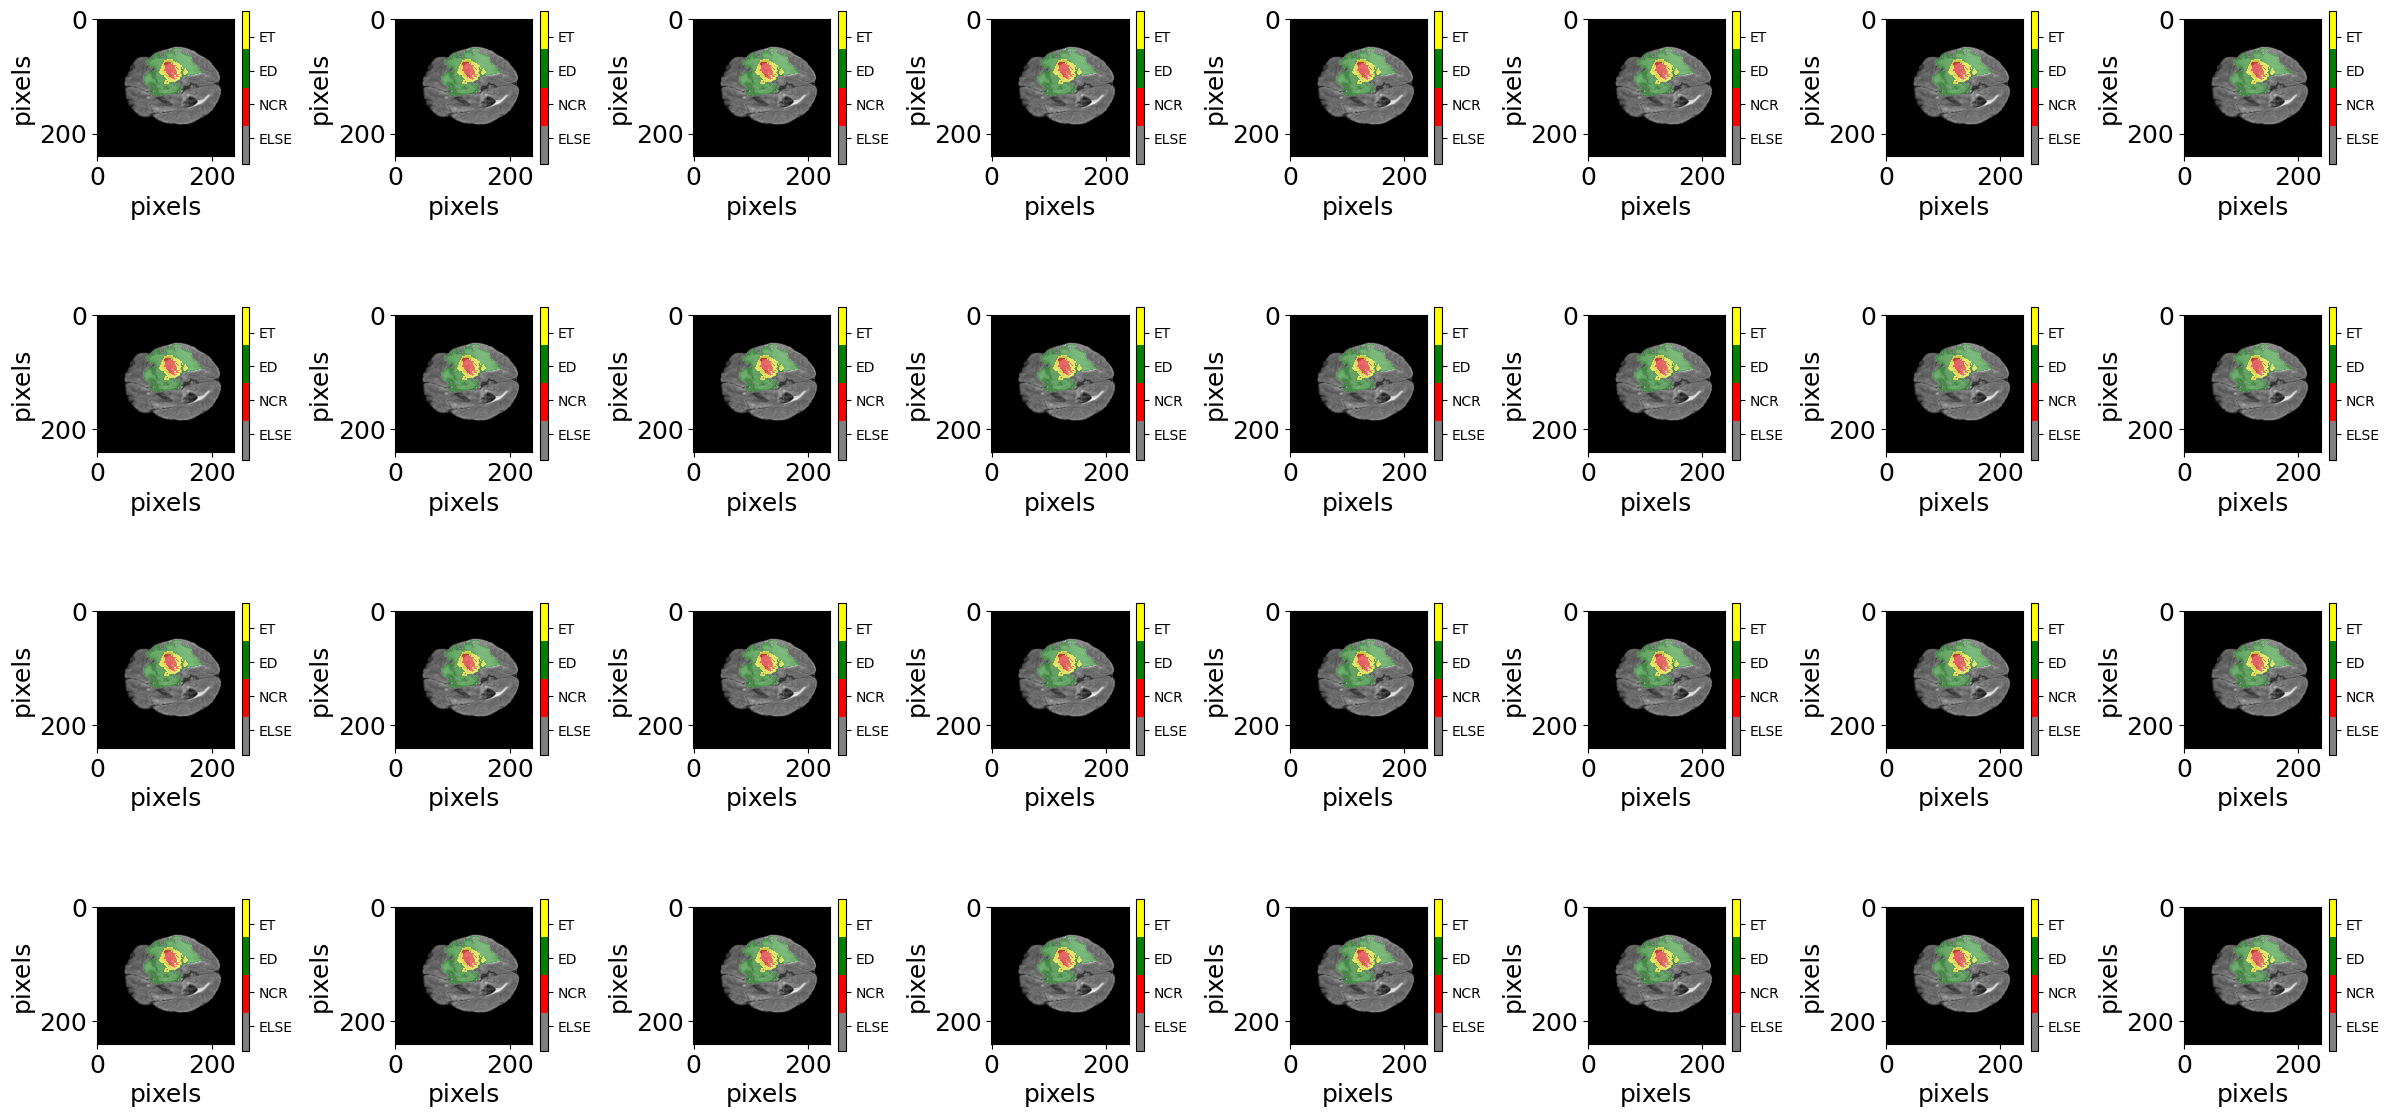

In [31]:
# visualize the structural images and its corresponding manually-revised segmentation label for starters
# set the number of plots per row and column
# Warning: needs high-RAM machine to run all (e.g. >80) plots
# nrows = 19
nrows = 4
ncols = 8

# set a constant color scale for all structure images
img_max = 1000
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))

# iteratively load the file structural images and display them
for idx in range(nrows*ncols):

    # go until no more samples
    if idx >= len(segm_files):
        break

    # determine which row/col to plot the current axs
    row = idx // ncols
    col = idx % ncols

    # extract the subject scan for the first manually-revised segmentation label
    subj_file = segm_files[0].split("_")[0]

    # load the images
    struct_img = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN, struct_scan=StructuralScan.FLAIR)
    segm_img = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED)

    # calculate slice idx
    slice_idx, nonzero_count = mri_common.get_largest_tumor_slice_idx(segm_img)
    print("Working on sample No.", idx, "display slide No.", slice_idx, " with ",
          nonzero_count, "non-zero pixels in label.")

    # plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=col, colorbar=False, slice_idx=slice_idx)

    # plot manually annotated (reduced) as overlay
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=col, overlay=True, segm_colorbar=True, slice_idx=slice_idx)

# show the figure
plt.tight_layout()
plt.show()
# fig.savefig('example_all_sample.pdf', format='pdf')


## 5. Zero data removal QC

In [32]:
# find the shape of image and number of samples

# find dimensions
subj_file = segm_files[0].split("_")[0]

img_data = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN, struct_scan=StructuralScan.FLAIR)

img_data.shape
n0 = img_data.shape[0]
n1 = img_data.shape[1]
n2 = img_data.shape[2]
nsamp = len(segm_files)

### initialize
all_zero_a0 = np.zeros( (n0, nsamp) )
all_zero_a1 = np.zeros( (n1, nsamp) )
all_zero_a2 = np.zeros( (n2, nsamp) )

a0_min_idx = n0
a0_max_idx = 0
a1_min_idx = n1
a1_max_idx = 0
a2_min_idx = n2
a2_max_idx = 0

# find non-zero slides
for struct_scan in StructuralScan:
    for idx in range(nsamp):
        # get the current image
        # extract the subject scan for the first manually-revised segmentation label
        subj_file = segm_files[0].split("_")[0]

        img_data = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN, struct_scan=struct_scan.value)

        # find all zero lines in each of the 3 dimensions
        all_zero_a01 = np.all(img_data == 0, axis=2)
        all_zero_a0[:,idx]  = np.all(all_zero_a01 == True, axis=1).astype(int)
        all_zero_a1[:,idx]  = np.all(all_zero_a01 == True, axis=0).astype(int)

        all_zero_a02 = np.all(img_data == 0, axis=1)
        all_zero_a2[:,idx]  = np.all(all_zero_a02 == True, axis=0).astype(int)

    # find all zero planes in each of the 3 dimensions
    a0_empty = np.all(all_zero_a0 == True, axis=1)
    a1_empty = np.all(all_zero_a1 == True, axis=1)
    a2_empty = np.all(all_zero_a2 == True, axis=1)

    # find new bound values
    a0_min_idx = np.min( (a0_min_idx, np.where(~a0_empty)[0].min()) )
    a0_max_idx = np.max( (a0_max_idx, np.where(~a0_empty)[0].max()) )
    a1_min_idx = np.min( (a1_min_idx, np.where(~a1_empty)[0].min()) )
    a1_max_idx = np.max( (a1_max_idx, np.where(~a1_empty)[0].max()) )
    a2_min_idx = np.min( (a2_min_idx, np.where(~a2_empty)[0].min()) )
    a2_max_idx = np.max( (a2_max_idx, np.where(~a2_empty)[0].max()) )

print("min idx in height is:",a0_min_idx,"max idx in height is:",a0_max_idx)
print("min idx in width is :",a1_min_idx,"max idx in width is :",a1_max_idx)
print("min idx in depth is :",a2_min_idx,"max idx in depth is :",a2_max_idx)

min idx in height is: 49 max idx in height is: 185
min idx in width is : 45 max idx in width is : 215
min idx in depth is : 0 max idx in depth is : 139


In [33]:
n0_new = a0_max_idx - a0_min_idx + 1
n1_new = a1_max_idx - a1_min_idx + 1
n2_new = a2_max_idx - a2_min_idx + 1
image_size_ratio = (a0_max_idx-a0_min_idx+1) * (a1_max_idx-a1_min_idx+1) * (a2_max_idx-a2_min_idx+1) / (n0 * n1 * n2)

print("Original height / width / depth :", n0, "/", n1, "/", n2)
print("     New height / width / depth :", n0_new, "/", n1_new, "/", n2_new)
print("Data reduction :", round((1-image_size_ratio)*100, 2), "%")

Original height / width / depth : 240 / 240 / 155
     New height / width / depth : 137 / 171 / 140
Data reduction : 63.26 %


## 6. Function to reduce data and save structure MRI with annotations

In [34]:
# create a new folder, save all reduced data into the new folder
# TODO: enable save later

import nibabel as nib
DATA_DIR = "/content/data/reduced"
reduce_data_path = DATA_DIR + '/images_reduced'

if not os.path.exists(reduce_data_path):
  os.makedirs(reduce_data_path)

for idx in range(nsamp):
  # find folder name
  subj_file = segm_files[idx].split("_")[0]

  # working on structure files
  for struct_scan in StructuralScan:
      # obtain file name
      struct = struct_scan.value
      img_data, nifti = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN,
                                       struct_scan=struct_scan.value, return_nifti=True)
      # reduce data
      sliced_data = nifti.get_fdata()[a0_min_idx:a0_max_idx, a1_min_idx:a1_max_idx, a2_min_idx:a2_max_idx]
      sliced_nifti = nib.Nifti1Image(sliced_data, nifti.affine, nifti.header)

      # save reduced data
      # UPENN-GBM-00002_11_FLAIR.nii.gz
      save_fn = reduce_data_path + '/' + subj_file +"_" + struct + '_cut.nii'
      # nib.save(sliced_nifti, save_fn)

  # working on segm files
  img_data, nifti = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED, return_nifti=True)

  # reduce data
  sliced_data = nifti.get_fdata()[a0_min_idx:a0_max_idx, a1_min_idx:a1_max_idx, a2_min_idx:a2_max_idx]
  sliced_nifti = nib.Nifti1Image(sliced_data, nifti.affine, nifti.header)

  # save reduced data
  save_fn = reduce_data_path + '/' + subj_file +"_" + struct + '_segm_cut.nii'
  # nib.save(sliced_nifti, save_fn)

In [55]:
# further compress file
import gzip
import shutil

input_dir  = reduce_data_path
output_dir = DATA_DIR + '/images_annot_reduced'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# obtaina list of all nii files
files = os.listdir(input_dir)
for name in files:
    if name.find('.nii') == -1:
        files.remove(name)

# compress all files to .gz
for name in files:
    # Open the input .nii file for reading in binary mode
    input_nii_path = input_dir + '/' + name
    output_nii_gz_path = output_dir + '/' + name + '.gz'
    with open(input_nii_path, 'rb') as input_file:
        # Open the output .nii.gz file for writing in binary mode
        with gzip.open(output_nii_gz_path, 'wb') as output_file:
            # Copy the contents of the input file to the output file
            shutil.copyfileobj(input_file, output_file)


/content/data/reduced/images_reduced
/content/data/reduced/images_annot_reduced


In [56]:
# # make a zip file
# # TODO
# !zip -r images_annot_reduced.zip $output_dir

updating: content/data/reduced/images_annot_reduced/ (stored 0%)


## 7. PCA analysis on 4 input channels

In [37]:
files_all = data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED_REDUCED)

In [38]:
# find unique patent IDs
patent_id = []
for file_cur in files_all:
    patent_id.append( file_cur.split('_')[0])
patent_id_unique = list(set(patent_id))
patent_id_unique.sort()
print(len(patent_id_unique))

147


In [39]:
# find all files given a patent ID
patent_id = patent_id_unique[0]
files_id = [file_cur for file_cur in files_all if patent_id in file_cur]
files_id.sort()
print(files_id)

['UPENN-GBM-00002_11_FLAIR_cut.nii.gz', 'UPENN-GBM-00002_11_T1GD_cut.nii.gz', 'UPENN-GBM-00002_11_T1_cut.nii.gz', 'UPENN-GBM-00002_11_T2_cut.nii.gz', 'UPENN-GBM-00002_11_segm_cut.nii.gz']


In [40]:
# load a test file to obtain dimensions
subj_file = files_id[0].split("_")[0]
img_data, nifti = data_handler.load_mri(subj_id=subj_file,
                                        mri_type=MriType.STRUCT_SCAN_REDUCED,
                                        struct_scan=StructuralScan.FLAIR,
                                        return_nifti=True)
n0 = nifti.shape[0]
n1 = nifti.shape[1]
n2 = nifti.shape[2]
image_4_exp = np.zeros( (n0,n1,4,n2) )
print( image_4_exp.shape )

(163, 193, 4, 146)


In [41]:
for idx, struct_scan in enumerate(StructuralScan):
    # obtain file name
    img_data, nifti = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN_REDUCED,
                                        struct_scan=struct_scan.value,
                                        return_nifti=True)

    image_4_exp[:,:,idx,:] = nifti.get_fdata()[:, :, :]

i2 = n2//2
image_4_exp_slice = np.reshape( image_4_exp[:,:,:,i2], (n0,n1,4) )
print( image_4_exp_slice.shape )

(163, 193, 4)


In [42]:
c0_min = np.min(image_4_exp_slice[:,:,0])
c1_min = np.min(image_4_exp_slice[:,:,1])
c2_min = np.min(image_4_exp_slice[:,:,2])
c3_min = np.min(image_4_exp_slice[:,:,3])
c0_max = np.max(image_4_exp_slice[:,:,0])
c1_max = np.max(image_4_exp_slice[:,:,1])
c2_max = np.max(image_4_exp_slice[:,:,2])
c3_max = np.max(image_4_exp_slice[:,:,3])

print(c0_min,c0_max,c1_min,c1_max,c2_min,c2_max,c3_min,c3_max)

image_4_exp_slice[:,:,0] = image_4_exp_slice[:,:,0] / c0_max
image_4_exp_slice[:,:,1] = image_4_exp_slice[:,:,1] / c1_max
image_4_exp_slice[:,:,2] = image_4_exp_slice[:,:,2] / c2_max
image_4_exp_slice[:,:,3] = image_4_exp_slice[:,:,3] / c3_max

0.0 630.0000303704292 0.0 311.00181575119495 0.0 1885.0108152776957 0.0 433.9989517573267


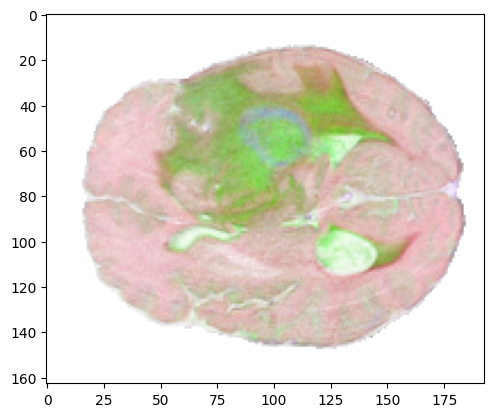

In [43]:
plt.imshow(image_4_exp_slice)
plt.show()

In [44]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 4)

# Perform PCA
pca = PCA(n_components=3)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 3)


In [45]:
# print eigen values
print(pca.explained_variance_)

[0.18579817 0.02857404 0.00650199]


In [46]:
# print weights in linear combinition
print(pca.components_)

[[ 0.63428797  0.47477169  0.25649434  0.5536075 ]
 [-0.68776259  0.56354601 -0.21463362  0.40414222]
 [ 0.09498855  0.67276651  0.09118946 -0.72804319]]


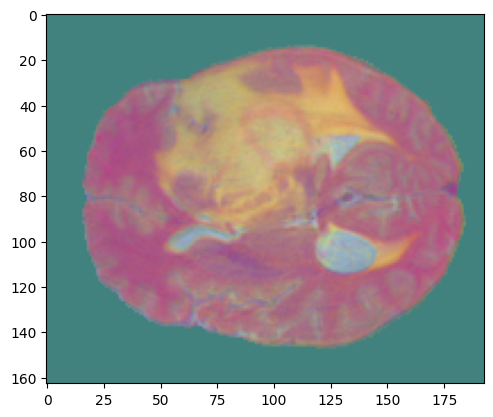

In [47]:
plt.imshow(transformed_image[:,:,:]/2+0.5)
plt.show()

In [48]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, transformed_image[:,:,2]/2+0.5), axis=1)
org_image = np.concatenate((image_4_exp_slice[:,:,0],image_4_exp_slice[:,:,1],image_4_exp_slice[:,:,2],image_4_exp_slice[:,:,3],), axis=1)

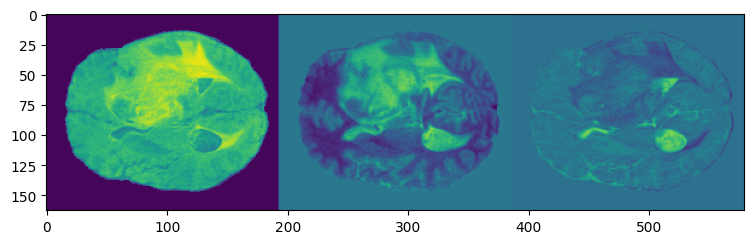

In [49]:
plt.figure(figsize=(9,3))
plt.imshow(pca_image)
plt.show()

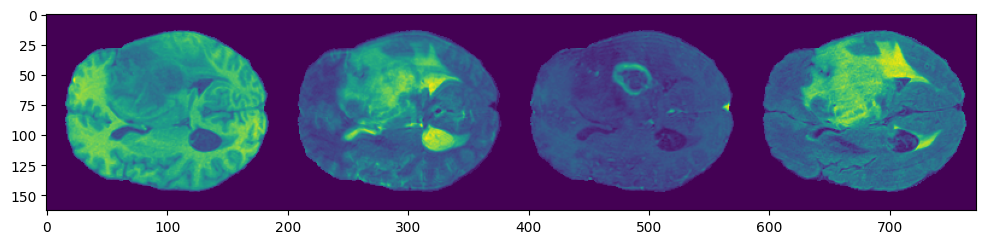

In [50]:
plt.figure(figsize=(12,3))
plt.imshow(org_image)
plt.show()

In [51]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice[:,:,0:3].copy()
image[:,:,1] = image_4_exp_slice[:,:,3]

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 3)

# Perform PCA
pca = PCA(n_components=2)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 2)


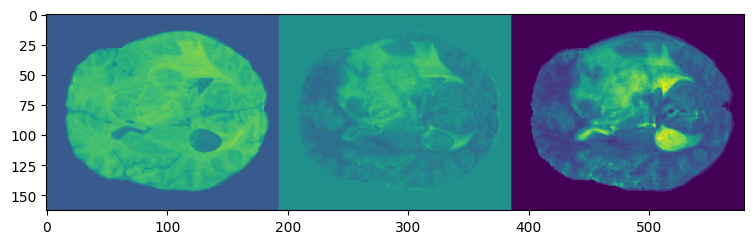

In [52]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, image_4_exp_slice[:,:,1]), axis=1)
plt.figure(figsize=(9,3))
plt.imshow(pca_image)
plt.show()